In [166]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns
from datetime import timedelta
import numpy as np

## The Plan!
- Chemometrics: Use BMK data to train a Chemometrics model

## To get marks: 
1. **Plotting:** Creat nice looking plots. Increase the complexity of the plots without deacreasing the legibility
2. **PANDAS:** Use Pandas to read/write/manipulate the data
3. **NUMPY:** How would I use NUMPY for this? 
4. **DATETIME:** Use the datetime module in Python 
5. **Machine Learning and Regression:** Use Scikit learn and some sort of regression to answer a question.
6. **Increase the range of the data:** How would I do this?  
 
#### Example:
- How much wind power is there at a particular location?
    - This is quite open ended, is this just the mean wind speed for
an hour/day/month/year, or should you take into account that
there are wind ranges that the windfarms can operate in. (min
max speeds)
    - Some analysis of what power when would be useful (time of
day/year)
- Are the wind speeds likely to be the same in 10 years in the future? ie
is there a trend in recorded wind speeds over the last few decades.
- Is there any other weather metric worth analyzing (eg rain, temp)
- What will the power output of the windfarms in Ireland be like next
week, according to the weather forecasts?

In [252]:
reference_raman_spectra= pd.read_csv("Raw Raman Data - Reference.csv")
reference_raman_spectra.head(n=20)

,RamanShift,0.625 mg/mL IgG1,1.25 mg/mL IgG1,2.5 mg/mL IgG1,5 mg/mL IgG1,10 mg/mL IgG1
0,3425,1148563.488,1198165.702,1206325.744,1195576.347,1145206.568
1,3424,1147939.547,1200700.777,1209881.628,1200249.487,1143337.351
2,3423,1146370.469,1203749.020,1208789.471,1202838.240,1141521.697
3,3422,1146941.245,1207620.020,1206416.272,1204755.062,1142453.918
4,3421,1149270.003,1207036.815,1206870.556,1207518.608,1146454.739
5,3420,1151020.458,1202523.303,1210572.212,1210860.394,1151460.412
6,3419,1152588.026,1201949.196,1214764.209,1210049.996,1153391.413
7,3418,1152704.622,1205438.810,1216319.624,1204616.249,1150386.364
8,3417,1150840.010,1206759.138,1214491.418,1201500.448,1146095.797
9,3416,1150839.957,1205196.988,1211307.781,1203258.972,1145880.594


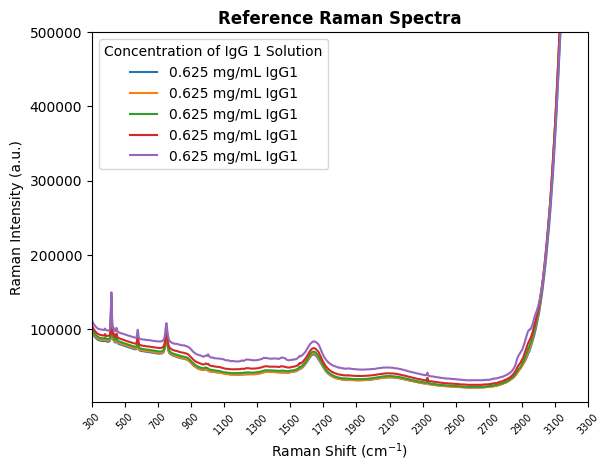

In [ ]:
ramanshift=np.sort(np.array(reference_raman_spectra["RamanShift"], dtype=int)) #Need to sort the wavenumbers for the x-axis 

fig, ax = plt.subplots()
for i in reference_raman_spectra.columns[1:]:
    ax.plot(
        reference_raman_spectra["RamanShift"],
        reference_raman_spectra[i],
        label=f"{reference_raman_spectra.columns[1:][0]}"
    )
ax.set_xticks(ramanshift[::200])
ax.set_xticklabels(ramanshift[::200], rotation=45, 
                   fontdict= {'fontsize': 'x-small',}
                   )
ax.set_xlim(300,3300)
ax.set_ylim(2500,0.5e6)
ax.set_xlabel(r'Raman Shift (cm$^{-1})$')
ax.set_ylabel("Raman Intensity (a.u.)")
ax.set_title("Reference Raman Spectra",
             fontdict = {'fontsize': 'large','fontweight' : "bold",}
             )
ax.legend(title= "Concentration of IgG 1 Solution")

In [169]:
experimental_raman_spectra= pd.read_csv("Raw Raman Data - Experiment.csv").T #Header=0 doesn't work here as transposition of the csv being read in occurs after that argument is passed
experimental_raman_spectra.columns=experimental_raman_spectra.iloc[0].to_list() #Set the first row as the column header
experimental_raman_spectra.drop(index=experimental_raman_spectra.index[0], inplace=True) #Drop the first row


In [ ]:
#Use timedelta to convert the data frame columns (1D array of  dtype='float64') to MM:SS
sampling_time = [timedelta(minutes=minutes) for minutes in experimental_raman_spectra.columns]
sampling_time_formatted = [f"{(time.seconds//60):02}:{(time.seconds%60):02}" for time in sampling_time]

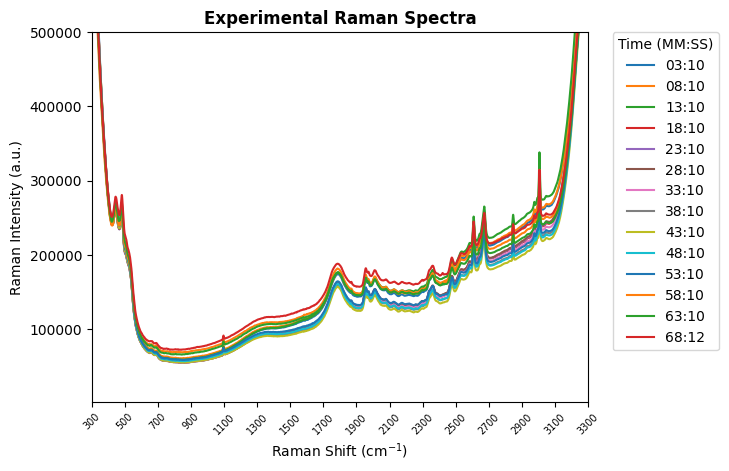

In [ ]:
#Generation of the x-axis 
wavenumbers = np.sort(np.array(experimental_raman_spectra.index, dtype=int))

fig, ax = plt.subplots()

for column in experimental_raman_spectra:
    ax.plot(
        experimental_raman_spectra.index,
        experimental_raman_spectra[column],
        label=column
    )
ax.set_xticks(wavenumbers[::200])
ax.set_xticklabels(wavenumbers[::200], rotation=45, 
                   fontdict= {'fontsize': 'x-small',}
                   )
ax.set_xlim(300,3300)
ax.set_ylim(2500,0.5e6)
ax.set_xlabel(r'Raman Shift (cm$^{-1})$')
ax.set_ylabel("Raman Intensity (a.u.)")
ax.set_title("Experimental Raman Spectra",
             fontdict = {'fontsize': 'large','fontweight' : "bold",}
             )
ax.legend(title= "Time (MM:SS)",
          labels= sampling_time_formatted,
          loc="upper left",
          bbox_to_anchor=(1.05, 1),
          borderaxespad=0
          )

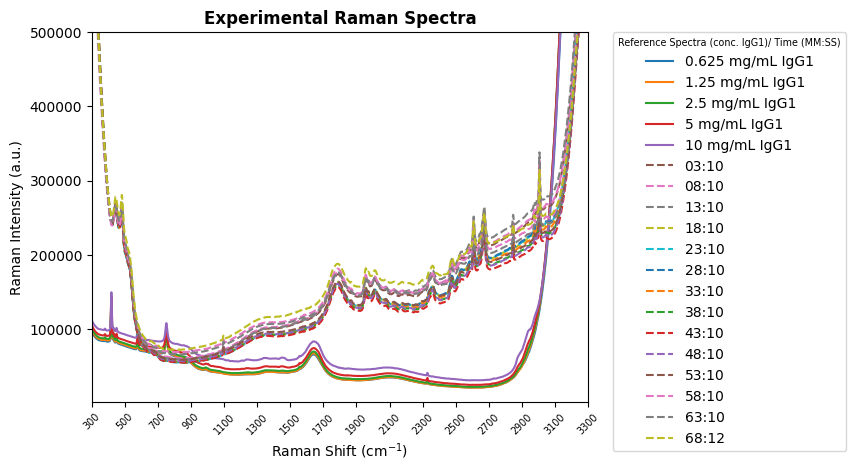

In [209]:
legend_labels= reference_raman_spectra.columns[1:].to_list() + sampling_time_formatted

fig, ax = plt.subplots()

for i in reference_raman_spectra.columns[1:]:
    ax.plot(
        reference_raman_spectra["RamanShift"],
        reference_raman_spectra[i],
        linestyle="-",
        # label=f"{reference_raman_spectra.columns[1:][0]}"
    )

for column in experimental_raman_spectra:
    ax.plot(
        experimental_raman_spectra.index,
        experimental_raman_spectra[column],
        linestyle="--"
        # label=column
    )
ax.set_xticks(wavenumbers[::200])
ax.set_xticklabels(wavenumbers[::200], rotation=45, 
                   fontdict= {'fontsize': 'x-small',}
                   )
ax.set_xlim(300,3300)
ax.set_ylim(2500,0.5e6)
ax.set_xlabel(r'Raman Shift (cm$^{-1})$')
ax.set_ylabel("Raman Intensity (a.u.)")
ax.set_title("Experimental Raman Spectra",
             fontdict = {'fontsize': 'large','fontweight' : "bold",}
             )
ax.legend(
          title= "Reference Spectra (conc. IgG1)/ Time (MM:SS)",
          labels= legend_labels,
          loc="upper left",
          bbox_to_anchor=(1.05, 1),
          borderaxespad=0,
          title_fontsize="x-small"
          )

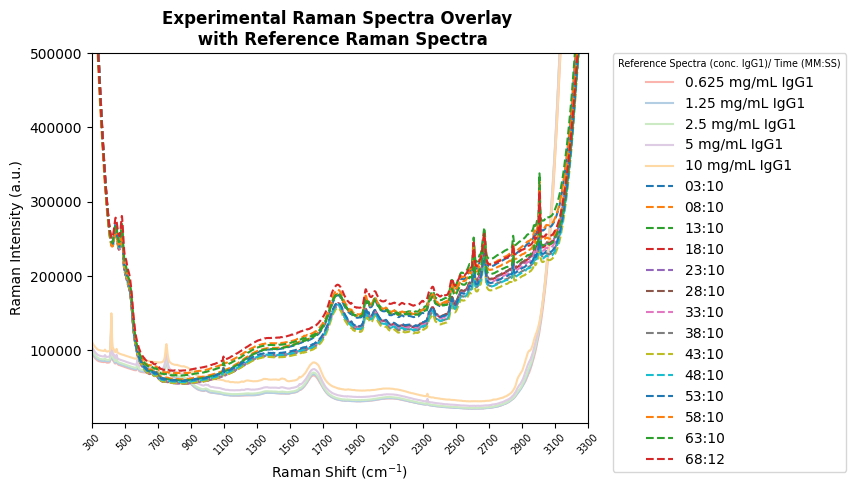

In [ ]:
#https://matplotlib.org/stable/users/explain/colors/colormaps.html
# https://matplotlib.org/stable/gallery/color/named_colors.html, 
# https://matplotlib.org/stable/gallery/color/colormap_reference.html
#https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html#colormap-manipulation

import matplotlib.colors as mcolors
from matplotlib import cm

colours_for_reference=cm.Pastel1.colors
legend_labels= reference_raman_spectra.columns[1:].to_list() + sampling_time_formatted

fig, ax = plt.subplots()

for idx, i in (enumerate(reference_raman_spectra.columns[1:])): #Gives each Column an index id to call for the list of colours I want to use
    ax.plot(
        reference_raman_spectra["RamanShift"],
        reference_raman_spectra[i],
        linestyle="-",
        color=colours_for_reference[idx] #Cycle through the pastel colour map list
        # label=f"{reference_raman_spectra.columns[1:][0]}"
    )

for column in experimental_raman_spectra:
    ax.plot(
        experimental_raman_spectra.index,
        experimental_raman_spectra[column],
        linestyle="--",
        # label=column
    )
ax.set_xticks(wavenumbers[::200])
ax.set_xticklabels(wavenumbers[::200], rotation=45, 
                   fontdict= {'fontsize': 'x-small',}
                   )
ax.set_xlim(300,3300)
ax.set_ylim(2500,0.5e6)
ax.set_xlabel(r'Raman Shift (cm$^{-1})$')
ax.set_ylabel("Raman Intensity (a.u.)")
ax.set_title(f"Experimental Raman Spectra Overlay \n with Reference Raman Spectra",
             fontdict = {'fontsize': 'large','fontweight' : "bold",}
             )
ax.set_subtitle
ax.legend(
          title= "Reference Spectra (conc. IgG1)/ Time (MM:SS)",
          labels= legend_labels,
          loc="upper left",
          bbox_to_anchor=(1.05, 1),
          borderaxespad=0,
          title_fontsize="x-small"
          )

## To do: 
From the overlaid plot above, the reference spectra Raman intensity and the experimental data raman intensity are noot scaled correctly. 
- Use SNV to normalise the data